In [1]:
import sys
sys.path.append("src/")
from LinkedList import LinkedList
from Event import Event
from ArrayList import ArrayList
from GenerateData import create_event_dataset
import matplotlib.pyplot as plt
import random

         n |    Insertion |      Merge |      Quick
--------------------------------------------------
        50 |      0.00296 |    0.00149 |    0.00163
       500 |      0.21559 |    0.02808 |    0.03162
      5000 |     19.74755 |    1.93396 |    2.40835
     50000 |   2146.40977 |  284.15857 |  541.64879


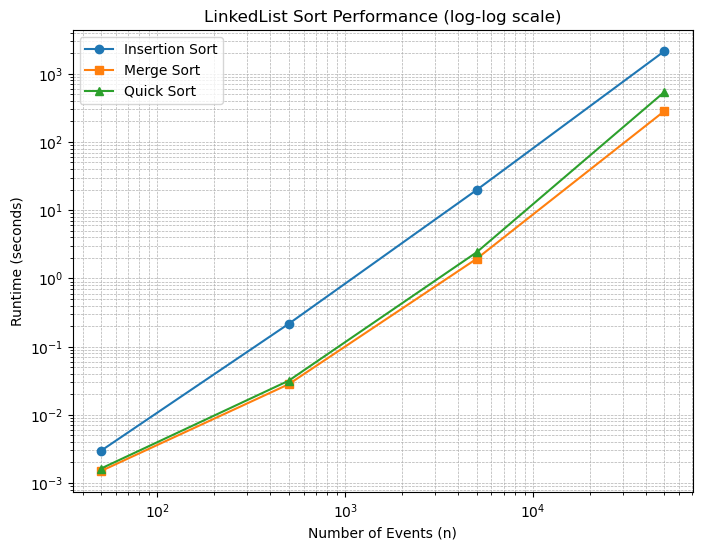

In [4]:
import random
import time
import matplotlib.pyplot as plt

# --- Random Event Generator ---
def generate_random_event(id):
    """Generate a random valid Event."""
    year = random.choice([2023, 2024, 2025])
    month = random.randint(1, 12)
    day = random.randint(1, 28)  # avoid invalid dates
    date = f"{year:04d}-{month:02d}-{day:02d}"
    
    start_hour = random.randint(0, 22)
    start_min = random.choice([0, 15, 30, 45])
    end_hour = min(start_hour + random.randint(1, 2), 23)
    end_min = start_min
    start_time = f"{start_hour:02d}:{start_min:02d}"
    end_time = f"{end_hour:02d}:{end_min:02d}"
    
    title = f"Event {id}"
    location = random.choice(["Denver", "Boulder", "Aspen", "Vail"])
    return Event(id, title, date, start_time, end_time, location)


# --- Plotting Function ---
def plot_performance(results):
    ns = [r[0] for r in results]
    insertion_times = [r[1] for r in results]
    merge_times = [r[2] for r in results]
    quick_times = [r[3] for r in results]

    plt.figure(figsize=(8,6))
    plt.plot(ns, insertion_times, marker='o', label="Insertion Sort")
    plt.plot(ns, merge_times, marker='s', label="Merge Sort")
    plt.plot(ns, quick_times, marker='^', label="Quick Sort")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("Number of Events (n)")
    plt.ylabel("Runtime (seconds)")
    plt.title("LinkedList Sort Performance (log-log scale)")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


# --- Measure & Plot Sort Performance ---
def measure_sort_performance_with_plot(n_values):
    results = []
    print(f"{'n':>10} | {'Insertion':>12} | {'Merge':>10} | {'Quick':>10}")
    print("-"*50)
    
    for n in n_values:
        ll = LinkedList()
        for i in range(n):
            ll.insert(generate_random_event(i))
        
        start = time.time()
        ll.sort_list(method="insertion", by="time")
        t_insertion = time.time() - start
        
        start = time.time()
        ll.sort_list(method="merge", by="time")
        t_merge = time.time() - start
        
        start = time.time()
        ll.sort_list(method="quick", by="time")
        t_quick = time.time() - start
        
        print(f"{n:10d} | {t_insertion:12.5f} | {t_merge:10.5f} | {t_quick:10.5f}")
        results.append((n, t_insertion, t_merge, t_quick))
    
    plot_performance(results)


# --- Run benchmark ---
if __name__ == "__main__":
    n_values = [50, 500, 5000, 50000]
    measure_sort_performance_with_plot(n_values)
